# 多选题

### 2.4. 
AQF，某量化基金经理，在进行蒙特卡洛模拟时想要产生500行10列服从标准正态分布的随机数，以下选项正确的是（）？  
A.  random.random(size=(500, 10))  
B.  numpy.random.randn(500, 10)  
C.  numpy.random.normal(size=(500, 10))  
D.  numpy.random.sample(size=(500, 10))  
E.  numpy.random.exponential(size=(500, 10))  

参考答案：BC

In [ ]:
import random 
import numpy as np

In [ ]:
help(random.random)

In [ ]:
# 产生一个随机数
random.random()

In [ ]:
help(np.random.randn)

In [ ]:
np.random.randn(500,10)

In [ ]:
np.random.normal(size=(500,10))

In [ ]:
# 连续均匀分布
help(np.random.sample)

In [ ]:
np.random.standard_normal()

### 2.7. 
假设当前有600001, 600002两只股票的ROE数据如下：
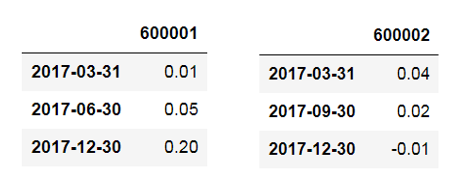

如果将两个储存数据的DataFrame以日期为参照进行横向并集合并，则使用的代码应为（）？  
A. pd.concat(df1, df2, axis=1)  
B. pd.concat([df1, df2], axis=1)  
C. pd.concat([df1, df2])   
D. pd.concat(df1, df2)  
E. pd.merge(df1, df2, left_index=True, right_index=True, how='outer')  

参考答案：BE

In [1]:
import pandas as pd

df1 = pd.DataFrame(
    [0.01, 0.05, 0.20],
    columns=['600001',],
    index=['2017-03-31', '2017-06-30', '2017-12-30']
)
df2 = pd.DataFrame(
    [0.04, 0.02, -0.01],
    columns=['600002',],
    index=['2017-03-31', '2017-09-30', '2017-12-30']
)

In [2]:
df1

,600001
2017-03-31,0.01
2017-06-30,0.05
2017-12-30,0.20


In [3]:
df2

,600002
2017-03-31,0.04
2017-09-30,0.02
2017-12-30,-0.01


In [6]:
# 选项A
pd.concat(df1, df2, axis=1)

,600001,600002
2017-03-31,0.01,0.04
2017-06-30,0.05,NaN
2017-09-30,NaN,0.02
2017-12-30,0.20,-0.01


In [7]:
# 选项B
# 横向拼接，结果默认取并集
pd.concat([df1, df2], axis=1)

,600001,600002
2017-03-31,0.01,0.04
2017-06-30,0.05,NaN
2017-09-30,NaN,0.02
2017-12-30,0.20,-0.01


In [8]:
# 选项C
# 纵向拼接（注意两个DataFrame列名不同时拼接方式）
pd.concat([df1,df2])

,600001,600002
2017-03-31,0.01,NaN
2017-06-30,0.05,NaN
2017-12-30,0.20,NaN
2017-03-31,NaN,0.04
2017-09-30,NaN,0.02
2017-12-30,NaN,-0.01


In [9]:
# 选项D
pd.concat(df1, df2)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [10]:
# 选项E
# 合并时参照左右两个DataFrame的index，合并方式为默认取交集
pd.merge(df1, df2, left_index=True, right_index=True, how='outer')

,600001,600002
2017-03-31,0.01,0.04
2017-06-30,0.05,NaN
2017-09-30,NaN,0.02
2017-12-30,0.20,-0.01


In [ ]:
help(pd.merge)

#### 2.7.1. 知识点

pd.concat(objs, axis=0, join='outer')

In [12]:
df1

,600001
2017-03-31,0.01
2017-06-30,0.05
2017-12-30,0.20


In [13]:
df2

,600002
2017-03-31,0.04
2017-09-30,0.02
2017-12-30,-0.01


In [14]:
# 横向拼接，结果取交集
pd.concat([df1,df2], axis=1, join='inner')

,600001,600002
2017-03-31,0.01,0.04
2017-12-30,0.20,-0.01


pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False)

In [20]:
import pandas as pd
df_left = pd.DataFrame(
    [['600001', 10],
     ['600002', 15],
     ['600003', 20]],
    columns=['code1', 'pe']
)
df_right = pd.DataFrame(
    [['600001', 0.05],
     ['600002', 0.03],
     ['600004', 0.07]],
    columns=['code2', 'roe']
)

In [21]:
df_left

,code1,pe
0,600001,10
1,600002,15
2,600003,20


In [22]:
df_right

,code2,roe
0,600001,0.05
1,600002,0.03
2,600004,0.07


In [24]:
# 以左右两个DataFrame的code列作为合并参照，采用默认的交集方式进行操作
pd.merge(df_left, df_right, left_on='code', right_on='code')

In [19]:
pd.merge(df_left, df_right)

,code,pe,roe
0,600001,10,0.05
1,600002,15,0.03


In [28]:
pd.merge(df_left, df_right, left_on='code1', right_on='code2')

,code1,pe,code2,roe
0,600001,10,600001,0.05
1,600002,15,600002,0.03
